<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/%EC%97%B0%EC%86%8D%EC%8B%A0%ED%98%B8%EC%9D%98_%EC%83%98%ED%94%8C%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**URL : https://angeloyeo.github.io/2022/01/14/sampling_CT_to_DT.html**

**에일리어싱 현상**

<ipython-input-39-85f32d0adb42>:66: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_sampled, signal_sampled, basefmt=" ", use_line_collection=True)


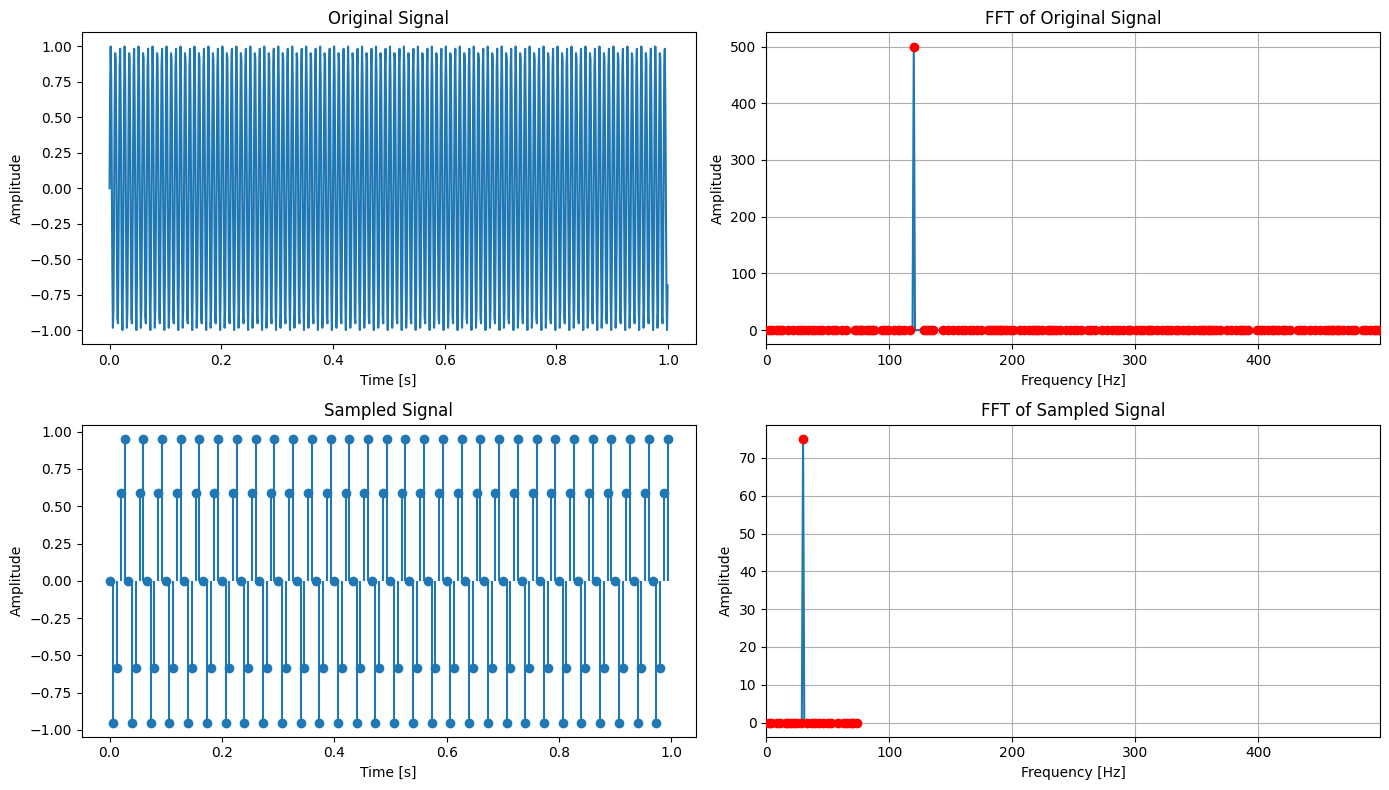

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

# 파라미터 설정
fs_original = 1000  # 원신호의 샘플링 주파수 (Hz)
t_end = 1  # 신호의 끝 (초)
t = np.linspace(0, t_end, fs_original * t_end, endpoint=False)  # 시간 축

# 원신호 생성: 주파수 60Hz, 120Hz 성분 포함
f1 = 0  # 주파수 60Hz
f2 = 120  # 주파수 120Hz
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# 에일리어싱이 발생하지 않는 샘플링 주파수 설정
fs_sampling = 150  # 샘플링 주파수 (Hz), 주파수 120Hz의 두 배
t_sampled = np.arange(0, t_end, 1/fs_sampling)
signal_sampled = np.sin(2 * np.pi * f1 * t_sampled) + np.sin(2 * np.pi * f2 * t_sampled)

# 주파수 영역의 FFT 계산
def compute_fft(signal, fs):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/fs)
    return xf, np.abs(yf)

# FFT 계산
xf_orig, yf_orig = compute_fft(signal, fs_original)
xf_sampled, yf_sampled = compute_fft(signal_sampled, fs_sampling)

# FFT 피크 찾기
def find_fft_peaks(xf, yf):
    peaks, _ = find_peaks(yf)
    return xf[peaks], yf[peaks]

xf_peaks_orig, yf_peaks_orig = find_fft_peaks(xf_orig, yf_orig)
xf_peaks_sampled, yf_peaks_sampled = find_fft_peaks(xf_sampled, yf_sampled)

# x축 범위 설정 (최대 주파수까지)
max_freq_orig = max(xf_orig)
max_freq_sampled = max(xf_sampled)
max_freq = max(max_freq_orig, max_freq_sampled)

# 그래프 생성
plt.figure(figsize=(14, 8))

# 원신호
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(xf_orig, yf_orig)
plt.scatter(xf_peaks_orig, yf_peaks_orig, color='red', zorder=5)
plt.title('FFT of Original Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, max_freq)  # x축 범위 설정
plt.grid()

# 샘플링된 신호
plt.subplot(2, 2, 3)
plt.stem(t_sampled, signal_sampled, basefmt=" ", use_line_collection=True)
plt.title('Sampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(xf_sampled, yf_sampled)
plt.scatter(xf_peaks_sampled, yf_peaks_sampled, color='red', zorder=5)
plt.title('FFT of Sampled Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, max_freq)  # x축 범위 설정
plt.grid()

plt.tight_layout()
plt.show()

**에일리어싱 현상 x**

<ipython-input-41-981c57e155df>:66: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_sampled, signal_sampled, basefmt=" ", use_line_collection=True)


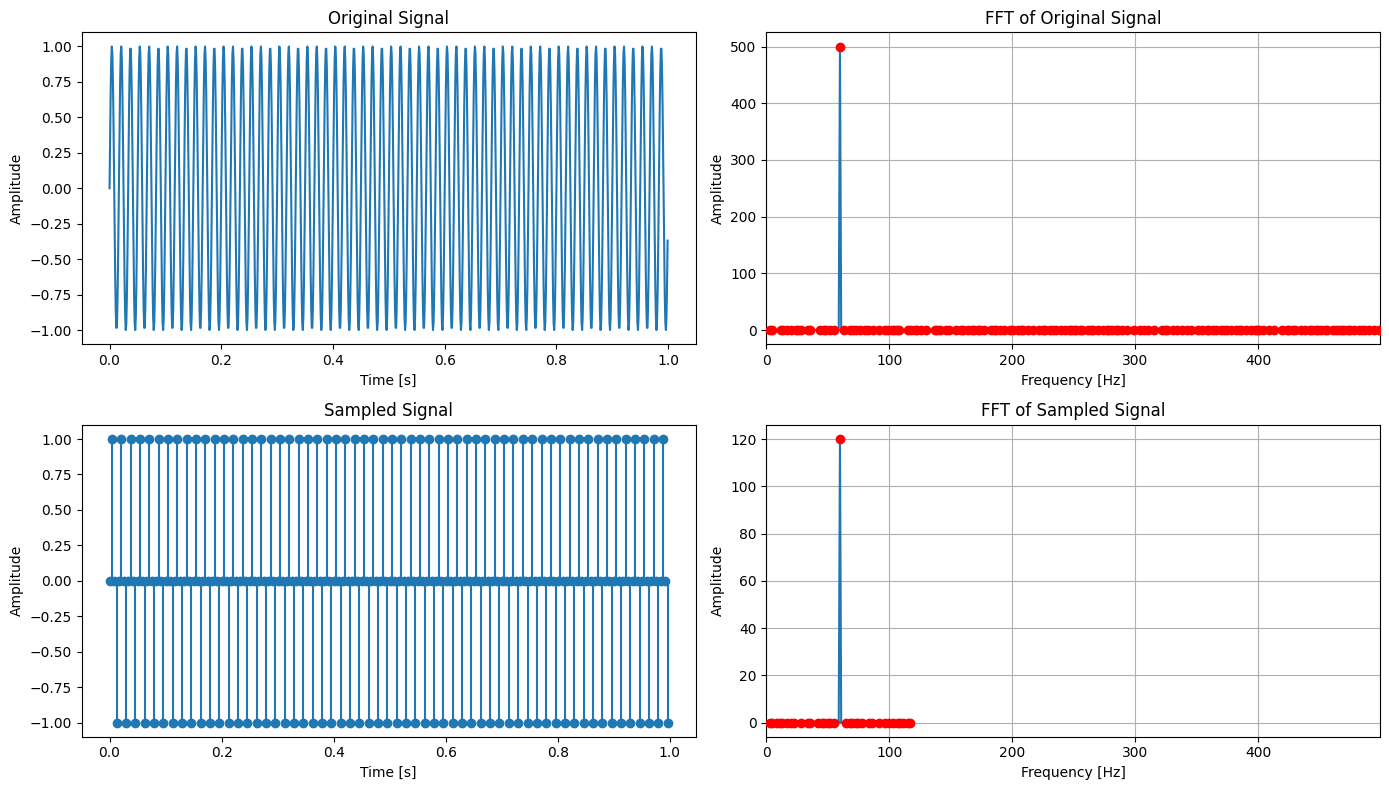

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

# 파라미터 설정
fs_original = 1000  # 원신호의 샘플링 주파수 (Hz)
t_end = 1  # 신호의 끝 (초)
t = np.linspace(0, t_end, fs_original * t_end, endpoint=False)  # 시간 축

# 원신호 생성: 주파수 60Hz, 120Hz 성분 포함
f1 = 60  # 주파수 60Hz
f2 = 0  # 주파수 120Hz
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# 에일리어싱이 발생하지 않는 샘플링 주파수 설정
fs_sampling = 240  # 샘플링 주파수 (Hz), 주파수 120Hz의 두 배
t_sampled = np.arange(0, t_end, 1/fs_sampling)
signal_sampled = np.sin(2 * np.pi * f1 * t_sampled) + np.sin(2 * np.pi * f2 * t_sampled)

# 주파수 영역의 FFT 계산
def compute_fft(signal, fs):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/fs)
    return xf, np.abs(yf)

# FFT 계산
xf_orig, yf_orig = compute_fft(signal, fs_original)
xf_sampled, yf_sampled = compute_fft(signal_sampled, fs_sampling)

# FFT 피크 찾기
def find_fft_peaks(xf, yf):
    peaks, _ = find_peaks(yf)
    return xf[peaks], yf[peaks]

xf_peaks_orig, yf_peaks_orig = find_fft_peaks(xf_orig, yf_orig)
xf_peaks_sampled, yf_peaks_sampled = find_fft_peaks(xf_sampled, yf_sampled)

# x축 범위 설정 (최대 주파수까지)
max_freq_orig = max(xf_orig)
max_freq_sampled = max(xf_sampled)
max_freq = max(max_freq_orig, max_freq_sampled)

# 그래프 생성
plt.figure(figsize=(14, 8))

# 원신호
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(xf_orig, yf_orig)
plt.scatter(xf_peaks_orig, yf_peaks_orig, color='red', zorder=5)
plt.title('FFT of Original Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, max_freq)  # x축 범위 설정
plt.grid()

# 샘플링된 신호
plt.subplot(2, 2, 3)
plt.stem(t_sampled, signal_sampled, basefmt=" ", use_line_collection=True)
plt.title('Sampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(xf_sampled, yf_sampled)
plt.scatter(xf_peaks_sampled, yf_peaks_sampled, color='red', zorder=5)
plt.title('FFT of Sampled Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(0, max_freq)  # x축 범위 설정
plt.grid()

plt.tight_layout()
plt.show()